---
layout: notebook
toc: true
title: 線形回帰
---

In [1]:
import numpy as np
import matplotlib as mpl
# 日本語のフォントを設定
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Noto Sans CJK JP']
mpl.rcParams['font.size'] = 18
# 図を大きくする
mpl.rcParams['figure.figsize'] = 10, 6
import matplotlib.pyplot as plt
import csv

# 線形単回帰

あるXデータとYデータが与えられた時、XとYの線形関係を調べたい。つまり、Xをx軸、Yをy軸にしたとき、データ点の大まかな傾向を表す線$y = ax + b$を当てはめたい。そうするにはどうすればいいか。次は、以下の具体的な問題を題材にして考えて行く。

# 具体的な問題

100件のマンションの専有面積と家賃が与えられた。

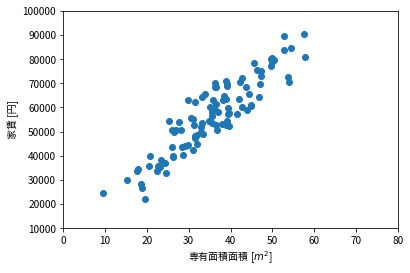

In [2]:
x = []
y = []
with open('data.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        x.append(float(row[0]))
        y.append(float(row[1]))
    
x = np.array(x)
y = np.array(y)
plt.scatter(x, y)
plt.xlim(0, 80)
plt.ylim(10000, 100000)
plt.xlabel("専有面積面積 [$m^2$]")
_ = plt.ylabel("家賃 [円]")

そこで、専有面積と家賃の関係を確かめたいので、専有面積を$x$とし、家賃を$y$とする。そして、新たなマンションについて、専有面積だけが与えられたときに、家賃をどれぐらいに設定すれば良いかを予測してくれるモデルを作りたい。ここで、面積と家賃が線形関係にあると仮定する。つまり、面積の家賃の関係を一本の直線で表せると仮定する。

これを特にはどうすればいいか？

# モデルを定義する

まず、面積と家賃の関係を厳密に定義するところから始める。線形関係と仮定しているので、$y$が$x$の線形関数になると考えると、以下の式を構築できる。

$$
y = ax + b
$$

しかし、図で見えるように、データ点は全て同じ線上にない。これを言い換えると、つまり上の関係に別の影響要素が含まれていると考えられる。今回は専有面積と家賃しか考えていないので、その別の要素を誤差項$\epsilon$として定義できる。そうすると、新しい式は以下のようになる：

$$
y = ax + b + \epsilon
$$

これで、上記の問題を解くために、$a$と$b$の値を求めればよい。しかし、誤差項があるので、我々は真の$a$と$b$を知ることができない。そこで、$a$と$b$の推定値$\hat a$と$\hat b$を考える。我々の目的は、与えられたデータから$\hat a$と$\hat b$が真の$a$と$b$に一番近づくように値を求めることである。そうすると、我々の推定は以下の式に従う：

$$
\hat y = \hat a x + \hat b
$$

# 残差を最小にする

何らかの計算をして、$\hat a$と$\hat b$を求められたとします。先程述べたように、これらはあくまで推定値であって、真の値になりません。必然的に、$\hat y$も$y$と違う値を取ります。その時、$y - \hat y$のことを**residual (残差)**といいます。

この残差をメドに、私達が計算したモデルの精度を測ることができます。具体的には、残差の平方和の半分を**コスト**として、以下の値を考えます：

$$
J(\hat a, \hat b) = \frac{1}{2} \sum_i^N {(y_i - \hat y_i)^2} = \frac{1}{2}\sum_i^N{(y_i - \hat a x_i - \hat b)^2}
$$

このコストを最小にしたいです。つまり、最小値を求めればいいので、ここで微分を使うことができます。それぞれの変数について、$\frac{\partial J}{\partial \hat a}$と$\frac{\partial J}{\partial \hat b}$が$0$となるような$\hat a$と$\hat b$を求めれば良いです。これらを計算してみると、以下のようになる：

$$
\begin{align}
\frac{\partial J}{\partial \hat a} &= \frac{1}{2}\sum_i^N{ 2x_i(y_i - \hat a x_i - \hat b)} = \sum_i^N{x_iy_i} - \hat a\sum_i^N{x_i^2} - \hat b\sum_i^N{x_i} = 0 \\
\frac{\partial J}{\partial \hat b} &= \frac{1}{2}\sum_i^N{ 2(y_i - \hat a x_i - \hat b)} = \sum_i^N{y_i} - \hat a\sum_i^N{x_i} - N\hat b = 0
\end{align}
$$

上の式を整理して書くと：

$$
\begin{align}
& \hat a\sum_i^N{x_i^2} + \hat b\sum_i^N{x_i} = \sum_i^N{x_iy_i} \\
& \hat a\sum_i^N{x_i} + \hat b N = \sum_i^N{y_i}
\end{align}
$$

実は、この計算は行列で書くことができます。

$$
\begin{pmatrix}
\sum x_i^2 & \sum x_i \\
\sum x_i & N
\end{pmatrix}
\begin{pmatrix}
\hat a \\
\hat b
\end{pmatrix}
=
\begin{pmatrix}
\sum y_ix_i \\
\sum y_i
\end{pmatrix}
$$

左辺の行列を$X$、ベクトルを$\hat B$、右辺を$Y$だとして、$\hat B$は以下で求められます：

$$
\hat B = X^{-1}Y
$$

ここで改めて式の意味を確認すると、$J$に関するそれぞれのパラメーターでの偏微分が0となるような$\hat a$と$\hat b$が答えになります。そして、$J$の微分が0となる点は$J$の最小値なので、残差の平方和が最小となるような$\hat a$と$\hat b$の値が求まります。

# 実際に求めてみる

In [3]:
X = np.array([
    [np.sum(x ** 2), np.sum(x)],
    [np.sum(x), len(x)]
])
Y = np.array([ np.sum(x * y), np.sum(y) ])
B = np.linalg.pinv(X) @ Y
B

array([1368.81906013, 8042.25140584])

上で計算をしてみると、$\hat a \approx 1369$が$\hat b \approx 8042$となりました。データ点に合わせ、求まった直線もプロットしてみましょう。

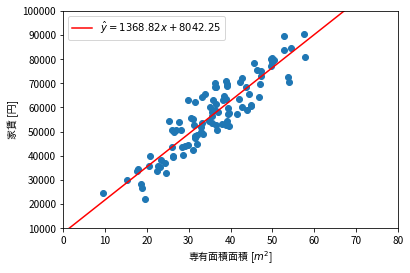

In [4]:
xr = np.linspace(0, 100)
yhat = B[0] * xr + B[1]

plt.scatter(x, y)
plt.plot(xr, yhat, color='red', label=f"$\\hat y = {B[0]:.2f}x + {B[1]:.2f}$")
plt.xlim(0, 80)
plt.ylim(10000, 100000)
plt.xlabel("専有面積面積 [$m^2$]")
plt.legend()
_ = plt.ylabel("家賃 [円]")

図から分かるように、赤い直線は確かに一番良さそうですね！

# 計算の一般性

今回は一つの説明変数（専有面積）と目的変数（家賃）の関係を調べましたが、説明変数・目的変数供に数を増やしても（例えば、マンションの専有面積と駅からの距離から、家賃と敷金の金額を予測するとか）、上の計算方法を少し工夫するだけで簡単に計算できます。

説明変数が$m$個、目的変数が$k$、データ点（サンプル）が$n$こ与えられたとします。ただし、データ点の$m$個目（最後の）説明変数が常に$1$の値を取るとします。なぜなら、上の式で$b$の定数を足す動作を$bx_m = b$として表せるからです。

これで、以下の表記を定義します：

- $x_i^{(j)}$ - サンプル$j$の$i$個目の説明変数
- $y_i^{(j)}$ - サンプル$j$の$i$個目の目的変数
- $\beta_{ij}$ - 目的変数$y_i$のモデルにおいて、説明変数$x_j$にかける係数

各目的変数を$y_i$として、以下のモデルで表せます：

$$
y_i = \beta_{i1}x_1 + \beta_{i2}x_2 + ... + \beta_{im}x_m + \epsilon = \Bigg( \sum_j^m \beta_{ij}x_j\Bigg) + \epsilon
$$

これはつまりどういうことかというと、各目的変数をお互いに関係ない別々の線形回帰だと考えているということです。更にここで再度注目すると、$x_m$は常に$1$なので、$w_{im}$は$y_i$におけるバイアス$b_i$に当たる。


もちろん、上記と同じく、真の$\beta$は知れないので、推定値$\hat\beta$を考えます。各目的変数に対し、$J_i$を定義すると、その目的変数のコストを考えることができます。ここで偏微分の計算を省略しますが、偏微分で各$J_i$を最小にする$\hat\beta$を計算するには以下を考えれば良いです：

$$
\begin{pmatrix}
\sum x_1x_2 & \sum x_1x_2 & \sum x_1x_3 & ... & \sum x_mx_1 \\
\sum x_2x_1 & \sum x_2x_2 & \sum x_2x_3 & ... & ... \\
\sum x_3x_1 & \sum x_3x_2 & ... & ... & ... \\
... & ... & ... & ... & \sum x_m \\
\sum x_mx_1 & ... & ... & \sum x_m & \sum x_mx_m 
\end{pmatrix}
\begin{pmatrix}
\hat\beta_{11} & \hat\beta_{21} & ... & \hat\beta_{k1} \\
\hat\beta_{12} & ... & ... & ... \\
... & ... & ... & ... \\
\hat\beta_{m1} & ... & ... & \hat\beta_{km}
\end{pmatrix}
=
\begin{pmatrix}
\sum y_1x_1 & \sum y_2x_1 & ... & \sum y_kx_1 \\
\sum y_1x_2 & ... & ... & ... \\
... & ... & ... & ... \\
\sum y_1x_m & ... & ... & \sum y_kx_m
\end{pmatrix}
$$

---
ここで、$\hat\beta$が入っている行列をまず$B$だとします。

次に、説明変数の積和が入っている左辺の行列に注目しましょう。まず、行列$X$を以下のように定義します：

$$
X = 
\begin{pmatrix}
x_1^{(1)} & x_2^{(1)} & ... & x_m^{(1)} \\
x_1^{(2)} & ... & ... & ... \\
... & ... & ... & ... \\
x_1^{(n)} & ... & ... & x_m^{(n)}
\end{pmatrix}
$$

ここで、$X^TX$を計算すると、$x$の平方和が入っている行列ができます。

---
次に、右辺の行列について考えます。行列$Y$を以下のように定義します：

$$
Y =
\begin{pmatrix}
y_1^{(1)} & y_2^{(1)} & ... & y_k^{(1)} \\
y_1^{(2)} & ... & ... & ... \\
... & ... & ... & ... \\
y_1^{(n)} & ... & ... & y_k^{(n)}
\end{pmatrix}
$$

これで$X^TY$を計算すると、上の式の右辺ができます。

---

上で導入したものを使って、改めて行列方式を書くと以下になります：

$$
X^TXB = X^TY
$$

我々は$B$について解きたいので、逆行列を用いて書くと：

$$
B = (X^TX)^{-1}X^TY
$$

これで、コストを最小にする$\hat\beta$が得られて、線形回帰問題を解くことができました。

---
上のように、線形回帰を複数の説明変数と目的変数を扱うモデルを**重回帰モデル**と呼びます。そして、先程示した一般解のことを**normal equations（正規方程式）**と呼びます。

# 正規方程式の問題点

正規方程式は綺麗な解き方ではありますが、パソコンで扱うには大きな問題点が2つあります。

1. $(X^TX)^{-1}$は逆行列で、一般的に逆行列を求めるのは時間がかかり、そもそも逆行列が存在しない場合もあるので、計算できないこともあります。
2. 逆行列をなんとか計算できたとしても、計算の精度はかなり低くなります。パソコンで扱える数値には限界がありますよね。`float`は7桁、`double`は15桁なので、範囲がかなり狭いです。

上の問題は実世界では大きな影響を及ぼすので、もっと賢いやりかたを考えなければいけません。